<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

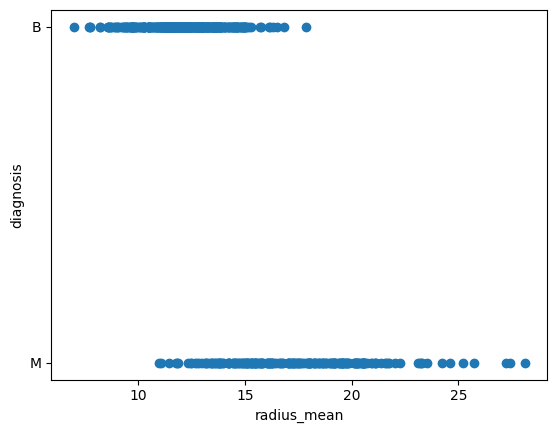

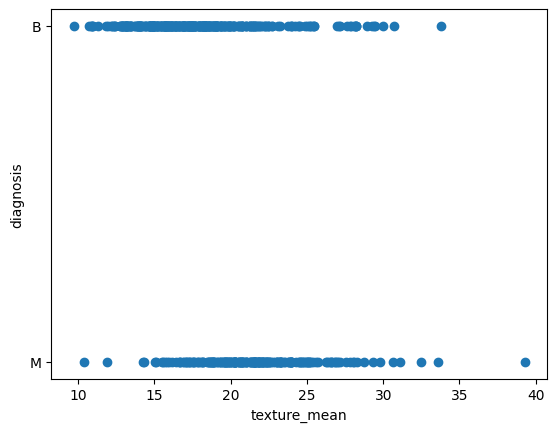

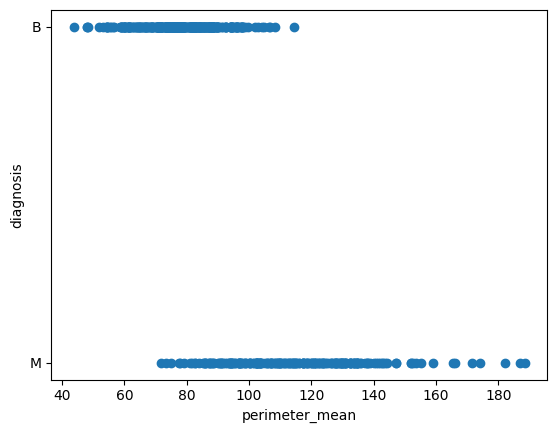

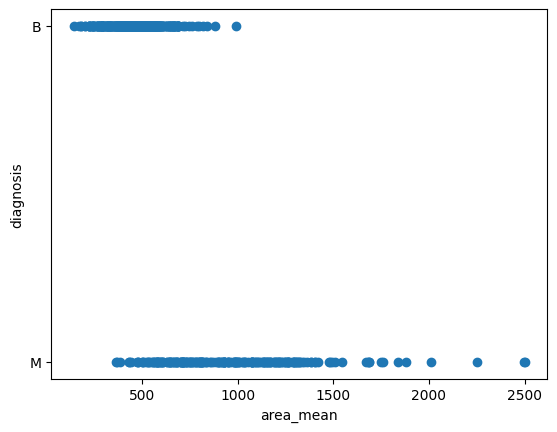

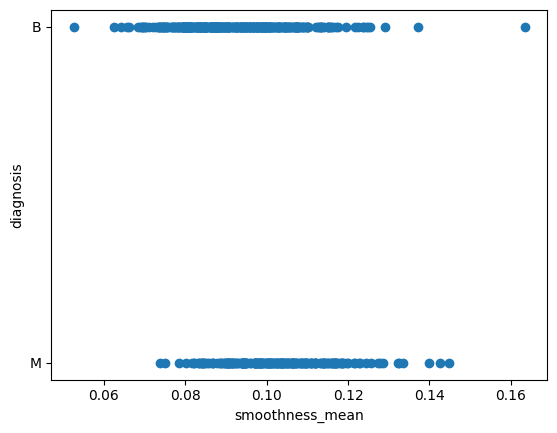

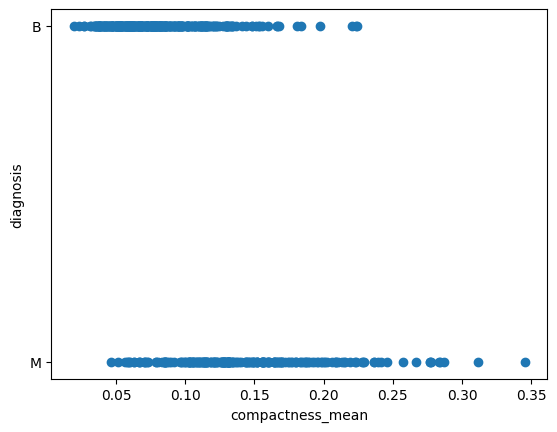

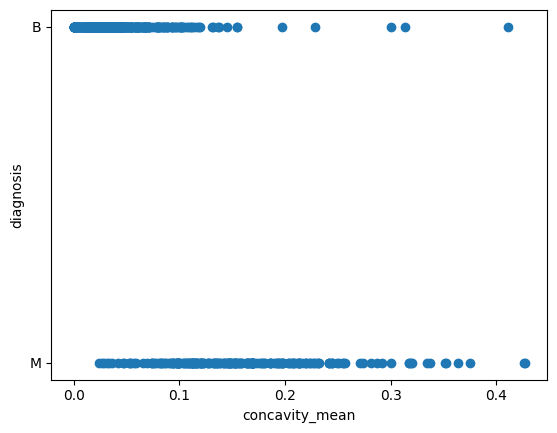

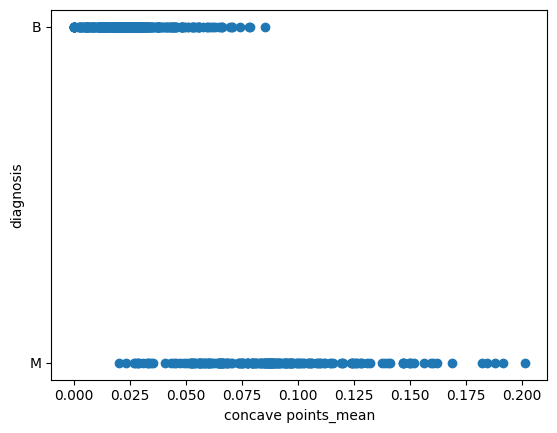

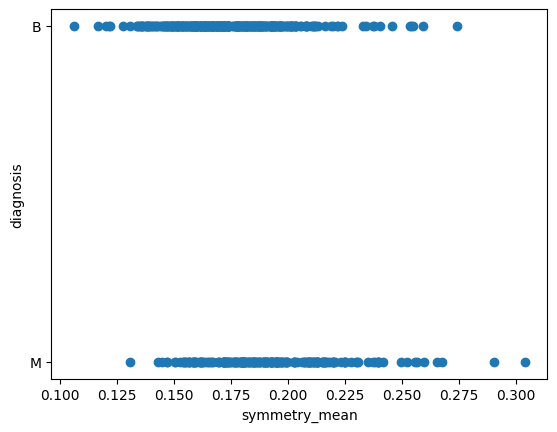

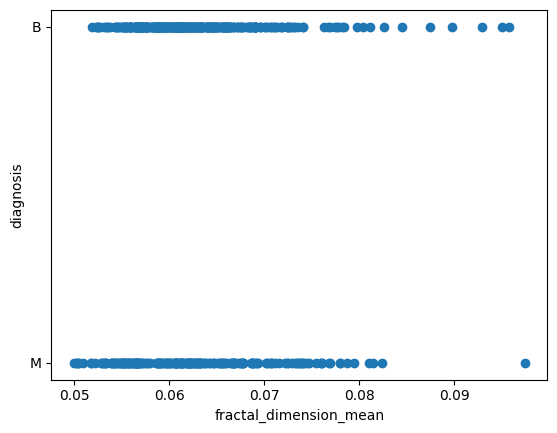

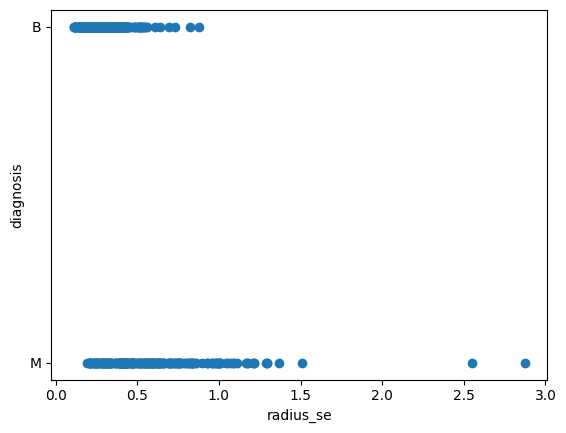

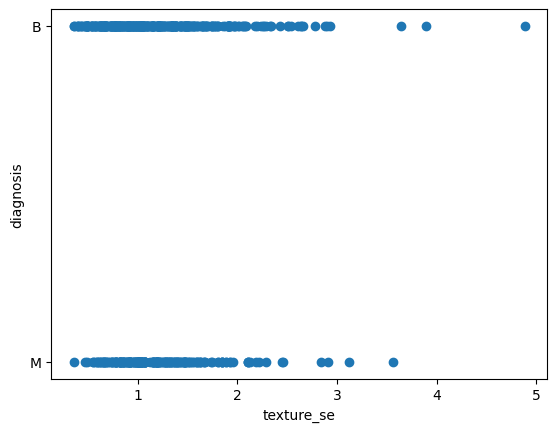

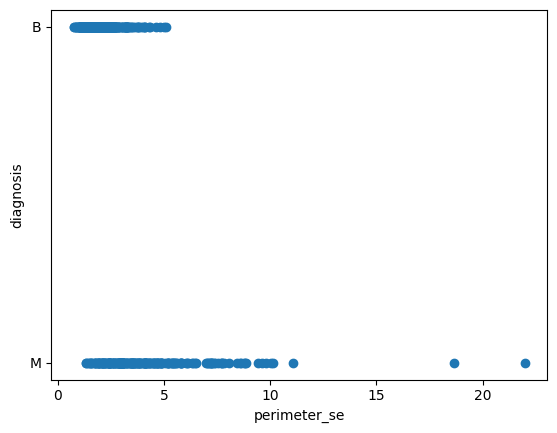

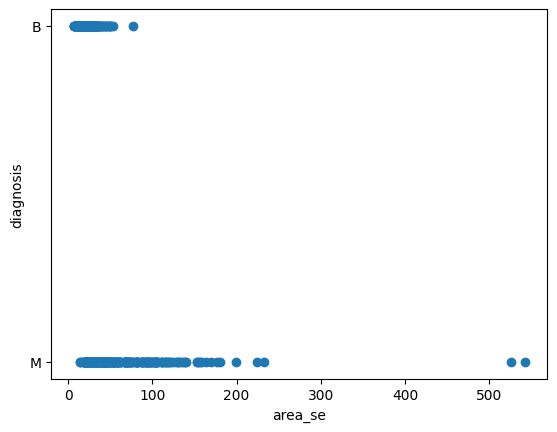

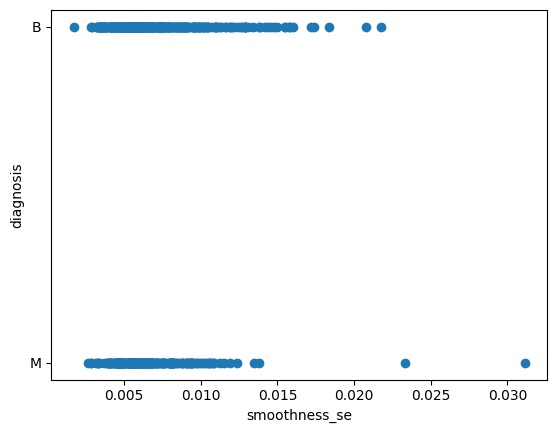

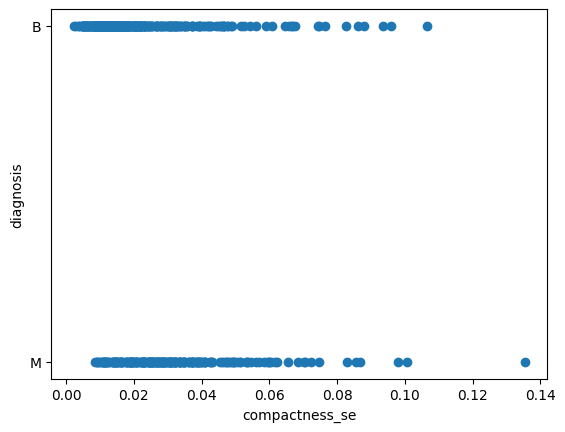

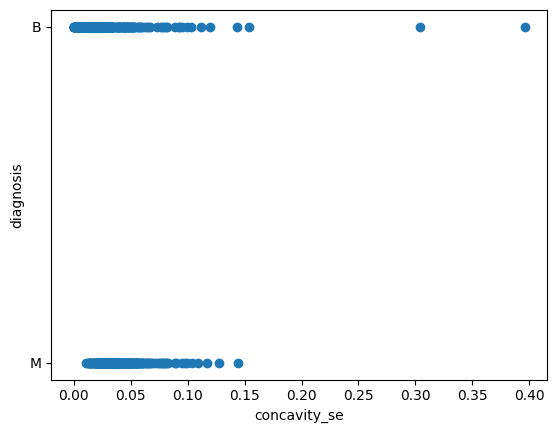

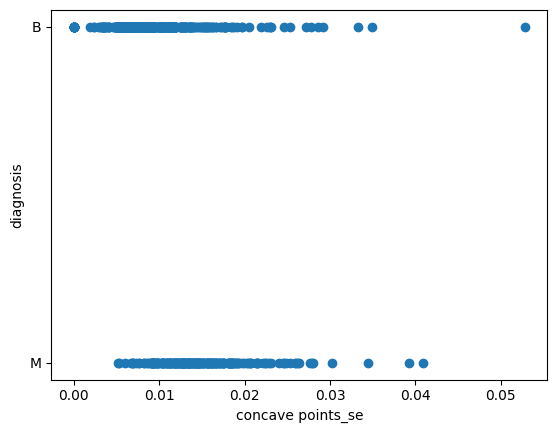

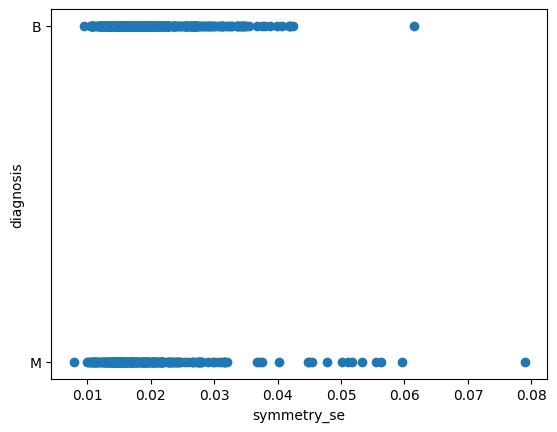

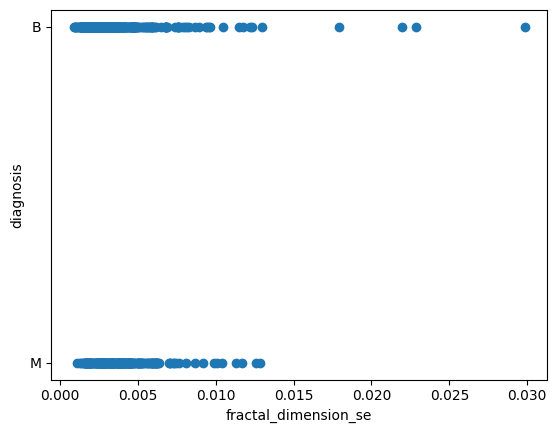

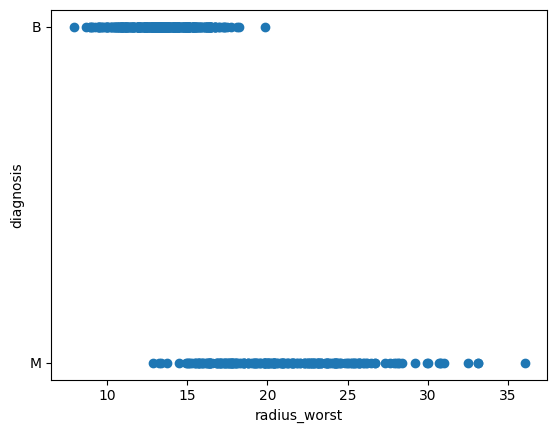

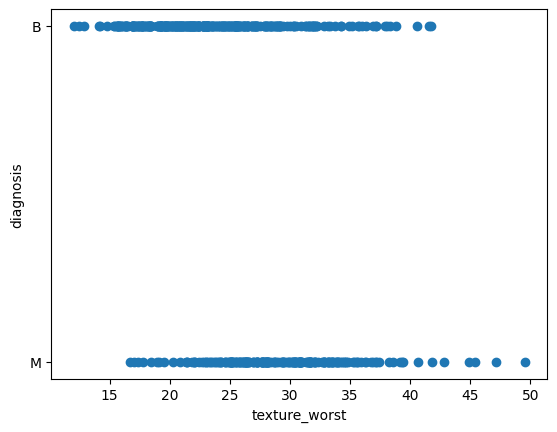

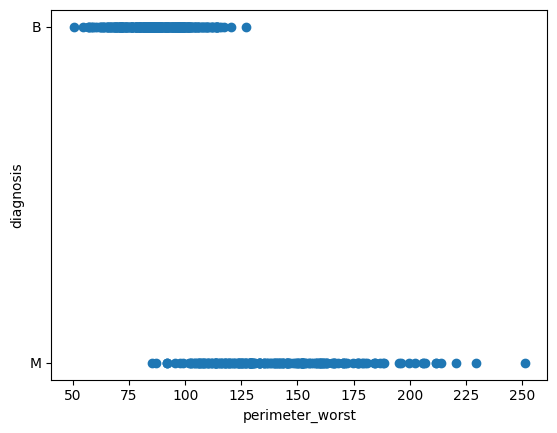

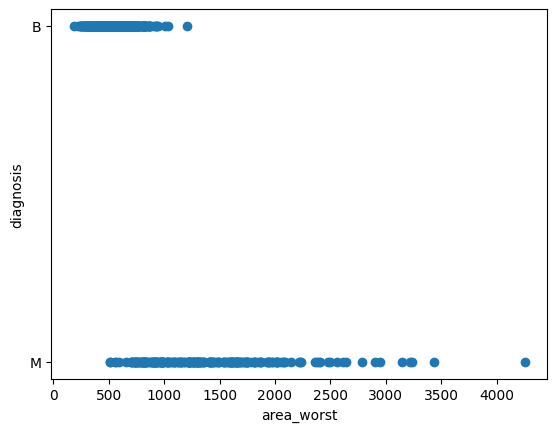

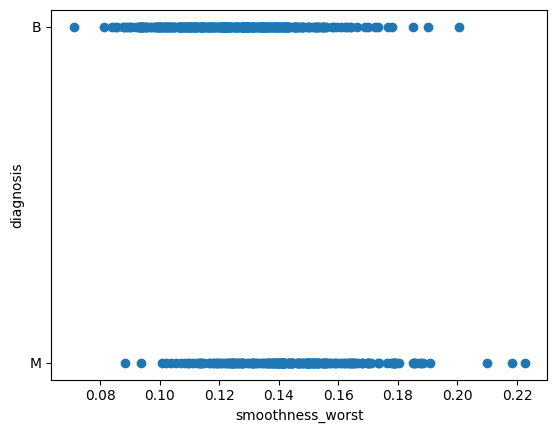

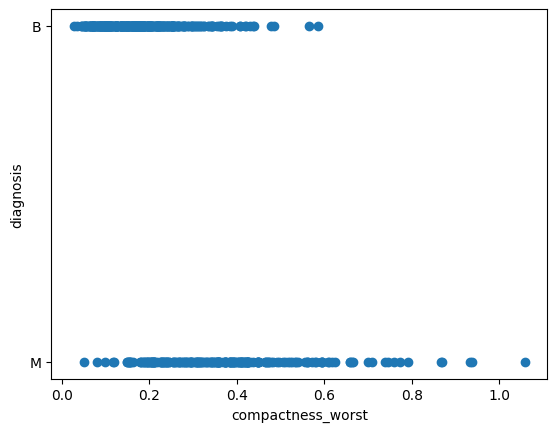

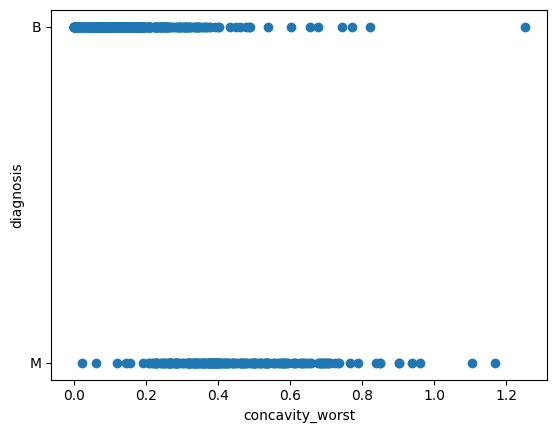

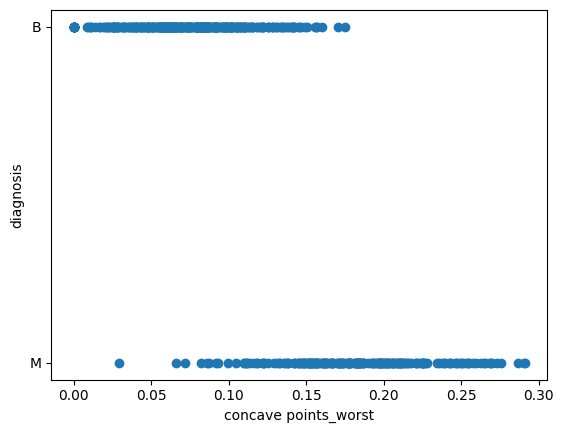

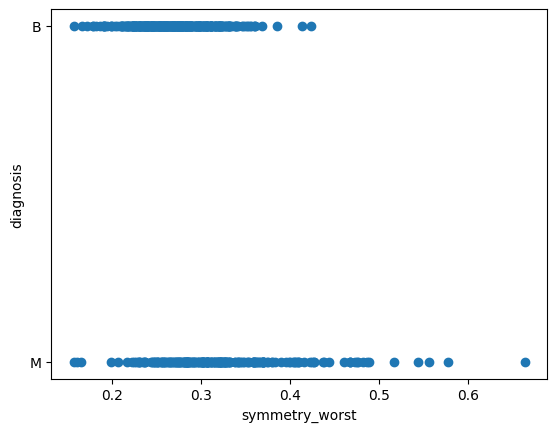

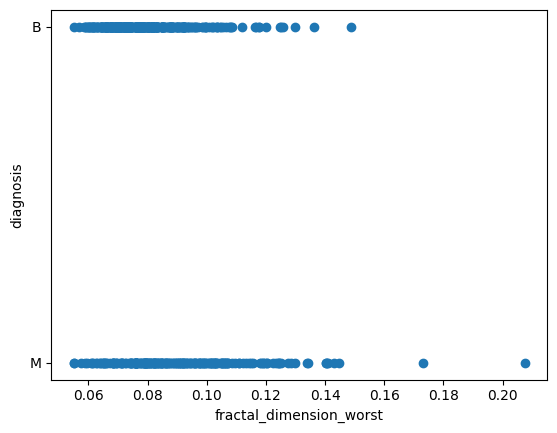

Original Dataset shape Counter({1: 268, 0: 158})
Resampled Dataset shape Counter({1: 265, 0: 265})
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.95      0.98      0.97        86

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



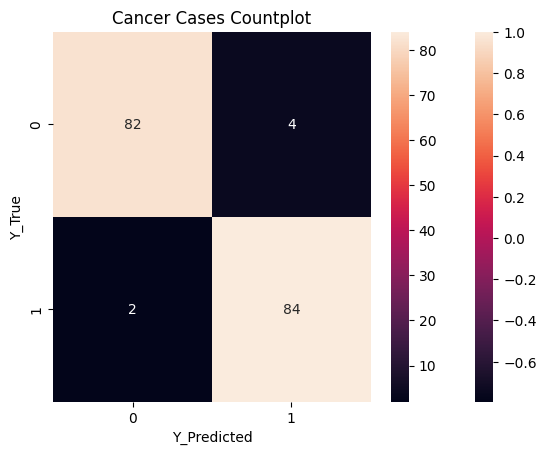

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("/content/bb.csv",index_col=False)
df.head()
df.info()
NaN_features = []
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        NaN_features.append(feature)
print(NaN_features)
df.drop(['id'],axis=1, inplace=True)
df.head()
for feature in df.columns:
    if feature!='diagnosis':

        plt.scatter(df[feature],df['diagnosis'])
        plt.xlabel(feature)
        plt.ylabel('diagnosis')
        plt.show()
df['diagnosis'].unique()
df['diagnosis']=df['diagnosis'].map({'M':0,"B":1})
df.head()
df.corr()
sns.heatmap(df.corr())
count_classes = pd.value_counts(df['diagnosis'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Cancer Cases Countplot")

plt.xticks(range(2), ['M', 'B'])

plt.xlabel("Class")

plt.ylabel("Frequency")
from imblearn.combine import SMOTETomek
df.shape
df.head()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = df.drop('diagnosis',axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
smk = SMOTETomek(random_state=42)
X_train_res,y_train_res = smk.fit_resample(X_train,y_train)
X_test_res, y_test_res = smk.fit_resample(X_test,y_test)
from collections import Counter
print("Original Dataset shape {}".format(Counter(y_train)))
print("Resampled Dataset shape {}".format(Counter(y_train_res)))
X_train.head()
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train,y_train)
classifier.score(X_test_res,y_test_res)
y_pred = classifier.predict(X_test_res)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res,y_pred)
cm
sns.heatmap(cm,annot=True)
plt.xlabel("Y_Predicted")
plt.ylabel("Y_True")
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test_res,y_pred))